In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_root_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          5.8042 ( 5.5329,  6.5643) ( 5.5224,  6.3691)  0.8468 (Jnode 106)\n',
 't_n56          5.7652 ( 5.4697,  6.5237) ( 5.4185,  6.3479)  0.9294 (Jnode 105)\n',
 't_n57          5.3325 ( 5.0264,  6.0383) ( 4.9810,  5.8812)  0.9002 (Jnode 104)\n',
 't_n58          4.7015 ( 4.4104,  5.3230) ( 4.3590,  5.1858)  0.8268 (Jnode 103)\n',
 't_n59          4.4718 ( 4.1843,  5.0655) ( 4.1342,  4.9398)  0.8056 (Jnode 102)\n',
 't_n60          4.2188 ( 3.9362,  4.7876) ( 3.8852,  4.6647)  0.7794 (Jnode 101)\n',
 't_n61          3.8500 ( 3.5724,  4.3699) ( 3.5212,  4.2655)  0.7444 (Jnode 100)\n',
 't_n62          2.0502 ( 1.7933,  2.3972) ( 1.7641,  2.3555)  0.5914 (Jnode 99)\n',
 't_n63          2.2222 ( 2.0035,  2.5569) ( 1.9782,  2.5089)  0.5306 (Jnode 98)\n',
 't_n64          1.4328 ( 1.2889,  1.6473) ( 1.2731,  1.6157)  0.3426 (Jnode 97)\n',
 't_n65          1.2330 ( 1.1069,  1.4202) ( 1.0925,  1.3946)  0.3021 (Jnode 96)\n',
 't_n66          0.9572 ( 0.8536,  1.1062) ( 0.8393,  1.08

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[5.8042,
 5.7652,
 5.3325,
 4.7015,
 4.4718,
 4.2188,
 3.85,
 2.0502,
 2.2222,
 1.4328,
 1.233,
 0.9572,
 0.6589,
 0.4354,
 0.1743,
 1.659,
 4.2799,
 3.8128,
 3.7538,
 2.6824,
 2.3513,
 1.5608,
 4.3413,
 4.0928,
 3.9149,
 3.6868,
 3.3999,
 3.2736,
 2.9064,
 2.6382,
 2.3827,
 1.8125,
 1.5842,
 2.8942,
 2.2948,
 4.2177,
 1.1425,
 4.079,
 3.7369,
 3.2799,
 2.9933,
 2.1479,
 2.4323,
 3.1232,
 2.9394,
 2.6146,
 2.0766,
 2.9057,
 4.6112,
 2.6838,
 1.5488,
 1.7705,
 3.6439]

In [7]:
lower_ci_iqtree

[5.5329,
 5.4697,
 5.0264,
 4.4104,
 4.1843,
 3.9362,
 3.5724,
 1.7933,
 2.0035,
 1.2889,
 1.1069,
 0.8536,
 0.5823,
 0.3775,
 0.1437,
 1.4529,
 3.9965,
 3.518,
 3.4651,
 2.4027,
 2.0762,
 1.2847,
 4.0665,
 3.8248,
 3.6512,
 3.4326,
 3.1606,
 3.0384,
 2.6859,
 2.4283,
 2.1828,
 1.6314,
 1.4107,
 2.6459,
 2.0513,
 3.9454,
 0.952,
 3.8119,
 3.4792,
 3.028,
 2.7521,
 1.8985,
 2.1917,
 2.8686,
 2.6885,
 2.3668,
 1.8194,
 2.6185,
 4.2565,
 2.3175,
 1.2864,
 1.5005,
 3.1401]

In [8]:
upper_ci_iqtree

[6.5643,
 6.5237,
 6.0383,
 5.323,
 5.0655,
 4.7876,
 4.3699,
 2.3972,
 2.5569,
 1.6473,
 1.4202,
 1.1062,
 0.7659,
 0.5119,
 0.212,
 1.9393,
 4.8453,
 4.3484,
 4.2739,
 3.0863,
 2.727,
 1.8976,
 4.9181,
 4.6387,
 4.4428,
 4.1879,
 3.8539,
 3.7148,
 3.3023,
 3.0033,
 2.7178,
 2.0797,
 1.8303,
 3.3036,
 2.636,
 4.7842,
 1.3789,
 4.6274,
 4.2377,
 3.728,
 3.4098,
 2.483,
 2.7915,
 3.5585,
 3.3578,
 2.9983,
 2.4167,
 3.3438,
 5.2444,
 3.1564,
 1.871,
 2.1119,
 4.2648]

In [9]:
file_LG = open("LG_root_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

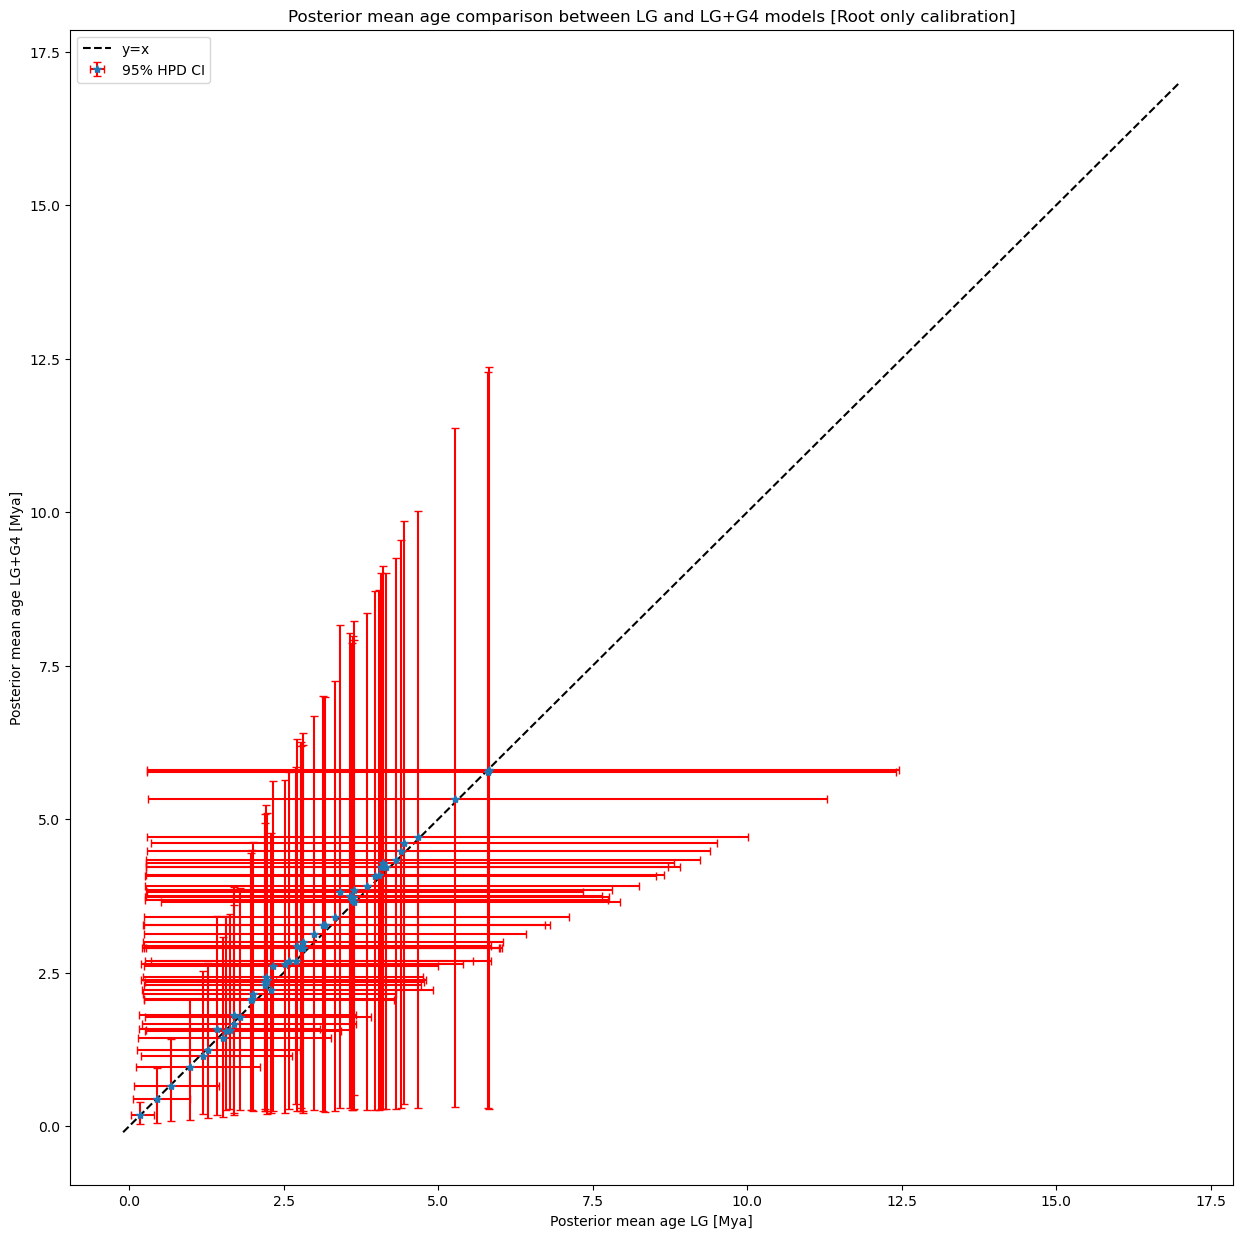

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Root only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ro.png')

In [11]:
posterior_mean_baseml

[5.8205,
 5.7984,
 5.2736,
 4.6751,
 4.3892,
 4.0722,
 3.6435,
 1.9723,
 2.2851,
 1.5171,
 1.2812,
 0.9827,
 0.6728,
 0.4478,
 0.181,
 1.6958,
 4.1129,
 3.4125,
 3.5664,
 2.5795,
 2.2007,
 1.6278,
 4.3111,
 4.0368,
 3.8489,
 3.609,
 3.3234,
 3.1724,
 2.8096,
 2.5175,
 2.2327,
 1.7015,
 1.4258,
 2.7843,
 2.188,
 4.1579,
 1.1964,
 3.979,
 3.6183,
 3.1364,
 2.8174,
 1.9982,
 2.2086,
 2.9882,
 2.7195,
 2.3181,
 1.9875,
 2.7851,
 4.437,
 2.6902,
 1.5566,
 1.7897,
 3.6435]

In [12]:
posterior_mean_iqtree

[5.8042,
 5.7652,
 5.3325,
 4.7015,
 4.4718,
 4.2188,
 3.85,
 2.0502,
 2.2222,
 1.4328,
 1.233,
 0.9572,
 0.6589,
 0.4354,
 0.1743,
 1.659,
 4.2799,
 3.8128,
 3.7538,
 2.6824,
 2.3513,
 1.5608,
 4.3413,
 4.0928,
 3.9149,
 3.6868,
 3.3999,
 3.2736,
 2.9064,
 2.6382,
 2.3827,
 1.8125,
 1.5842,
 2.8942,
 2.2948,
 4.2177,
 1.1425,
 4.079,
 3.7369,
 3.2799,
 2.9933,
 2.1479,
 2.4323,
 3.1232,
 2.9394,
 2.6146,
 2.0766,
 2.9057,
 4.6112,
 2.6838,
 1.5488,
 1.7705,
 3.6439]

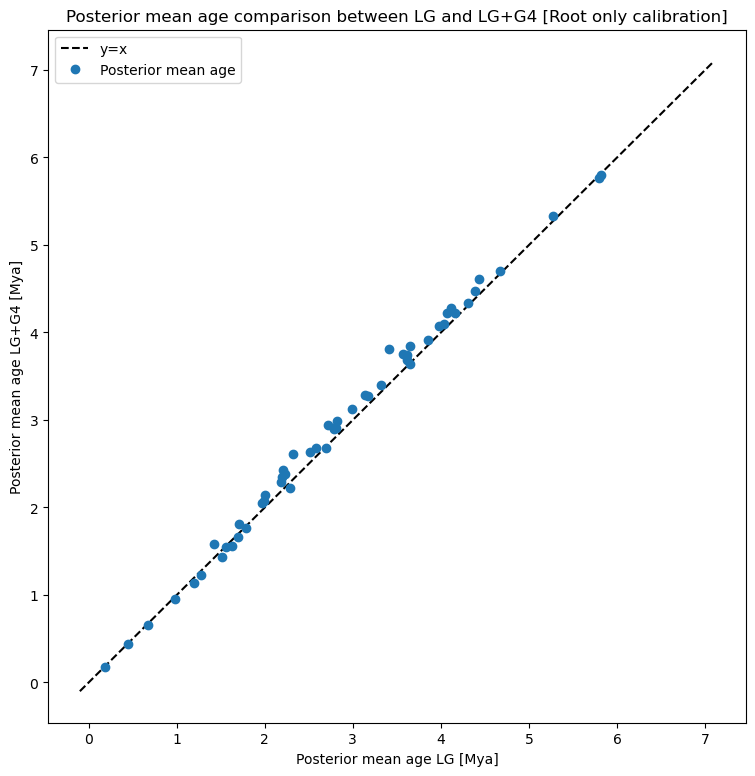

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,7.1], 
        [-0.1, 7.1], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ro_scatter.png')